Trương Duy Kha 19146015

Link Github: https://github.com/TruongDuyKha/10_Fruit_CNN.git

Link dataset: https://drive.google.com/drive/folders/1jleKnNWWy5lted5MGnzIyCf6B04jZITl?usp=sharing

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import glob

In [ ]:
apple = list()
for img in glob.glob('/content/drive/MyDrive/dataset/apple_fruit/*.jpg'):
  apple.append(img_to_array(load_img(img,target_size=(150,150))))
avocado = list()
for img in glob.glob('/content/drive/MyDrive/dataset/avocado_fruit/*.jpg'):
  avocado.append(img_to_array(load_img(img,target_size=(150,150))))
banana = list()
for img in glob.glob('/content/drive/MyDrive/dataset/banana_fruit/*.jpg'):
  banana.append(img_to_array(load_img(img,target_size=(150,150))))
durian = list()
for img in glob.glob('/content/drive/MyDrive/dataset/durian_fruit/*.jpg'):
  durian.append(img_to_array(load_img(img,target_size=(150,150))))
mango = list()
for img in glob.glob('/content/drive/MyDrive/dataset/mango_fruit/*.jpg'):
  mango.append(img_to_array(load_img(img,target_size=(150,150))))
orange = list()
for img in glob.glob('/content/drive/MyDrive/dataset/orange_fruit/*.jpg'):
  orange.append(img_to_array(load_img(img,target_size=(150,150))))
persimmon = list()
for img in glob.glob('/content/drive/MyDrive/dataset/persimmon_fruit/*.jpg'):
  persimmon.append(img_to_array(load_img(img,target_size=(150,150))))
starfruit = list()
for img in glob.glob('/content/drive/MyDrive/dataset/starfruit_fruit/*.jpg'):
  starfruit.append(img_to_array(load_img(img,target_size=(150,150))))
strawberry = list()
for img in glob.glob('/content/drive/MyDrive/dataset/strawberry_fruit/*.jpg'):
  strawberry.append(img_to_array(load_img(img,target_size=(150,150))))
pineapple = list()
for img in glob.glob('/content/drive/MyDrive/dataset/pineapple_fruit/*.jpg'):
  pineapple.append(img_to_array(load_img(img,target_size=(150,150))))

In [ ]:
input_dataset = np.array(apple + avocado +banana+durian + mango+ orange+ persimmon+ starfruit + strawberry + pineapple)
label_dataset = np.array([0]*len(apple) + [1]*len(avocado) + [2]*len(banana) + [3]*len(durian) + [4]*len(mango) + [5]*len(orange) + [6]*len(persimmon) + [7]*len(starfruit) + [8]*len(strawberry) + [9]*len(pineapple))

In [ ]:
print(input_dataset.shape)
print(label_dataset.shape)

(1306, 150, 150, 3)
(1306,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input_dataset,label_dataset
                                                    ,train_size=0.8, test_size=0.2, random_state= 0)

In [ ]:
y_test.shape

(262,)

In [ ]:
y_train.shape

(1044,)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test/= 255

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
y_train.shape

(1044, 10)

In [ ]:
Model = Sequential()
Model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same',input_shape = (150,150,3)))
Model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
Model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
Model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Flatten())
Model.add(Dense(128,activation= 'relu',kernel_initializer='he_uniform'))
Model.add(Dense(10,activation = 'softmax'))
opt = SGD(lr = 0.01,momentum = 0.9)
Model.compile(optimizer= opt,loss = 'categorical_crossentropy', metrics=['accuracy'])
history = Model.fit(x_train,y_train,epochs=100,batch_size = 64,validation_data=(x_test,y_test), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
17/17 [==============================] - 3s 144ms/step - loss: 2.4644 - accuracy: 0.1255 - val_loss: 2.2798 - val_accuracy: 0.1527
Epoch 2/100
17/17 [==============================] - 2s 128ms/step - loss: 2.1929 - accuracy: 0.1868 - val_loss: 1.9812 - val_accuracy: 0.2672
Epoch 3/100
17/17 [==============================] - 2s 129ms/step - loss: 2.0324 - accuracy: 0.2395 - val_loss: 2.2995 - val_accuracy: 0.1679
Epoch 4/100
17/17 [==============================] - 2s 129ms/step - loss: 1.9781 - accuracy: 0.2644 - val_loss: 1.8550 - val_accuracy: 0.3130
Epoch 5/100
17/17 [==============================] - 2s 129ms/step - loss: 1.7546 - accuracy: 0.3352 - val_loss: 1.7146 - val_accuracy: 0.3321
Epoch 6/100
17/17 [==============================] - 2s 130ms/step - loss: 1.6597 - accuracy: 0.3755 - val_loss: 1.7076 - val_accuracy: 0.3664
Epoch 7/100
17/17 [==============================] - 2s 129ms/step - loss: 1.6345 - accuracy: 0.4033 - val_loss: 2.3855 - val_accuracy: 0.2901

In [ ]:
score = Model.evaluate(x_test,y_test,verbose = 1)

9/9 [==============================] - 0s 29ms/step - loss: 4.9816 - accuracy: 0.4542


banana


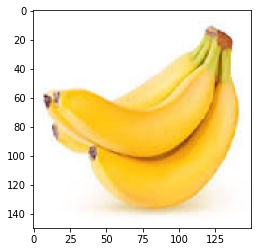

In [ ]:
y_label = ['apple','avocado','banana','durian', 'mango', 'orange', 'persimmon','starfruit','strawberry', 'pineapple']
img = load_img('banana.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
print(y_label[np.argmax(Model.predict(img),axis = 1)[0]])

mango


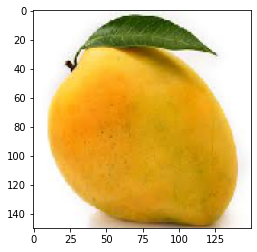

In [ ]:
img = load_img('mango.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
print(y_label[np.argmax(Model.predict(img),axis = 1)[0]])

persimmon


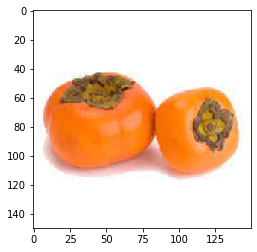

In [ ]:
img = load_img('persimmon.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
print(y_label[np.argmax(Model.predict(img),axis = 1)[0]])

starfruit


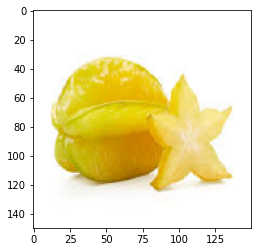

In [ ]:
img = load_img('startfruit.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
print(y_label[np.argmax(Model.predict(img),axis = 1)[0]])